## ブースティング

### AdaBoost

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df = df.dropna()

# 学習データ作成
X = df.loc[:, (df.columns != 'survived') & (df.columns != 'alive')]
y = df["survived"]

# 決定木モデルではワンホットエンコーディングではなく、ラベルエンコーディングでも問題ない
# 理由：
oe = OrdinalEncoder()
oe.set_output(transform = 'pandas')
X = oe.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.01, random_state = 0).fit(X_train, y_train)
y_pred_ada = ada.predict_proba(X_test)
print(f"adaboost AUC: {roc_auc_score(y_test, y_pred_ada[:, 1])}")

adaboost AUC: 0.9375


<BarContainer object of 13 artists>

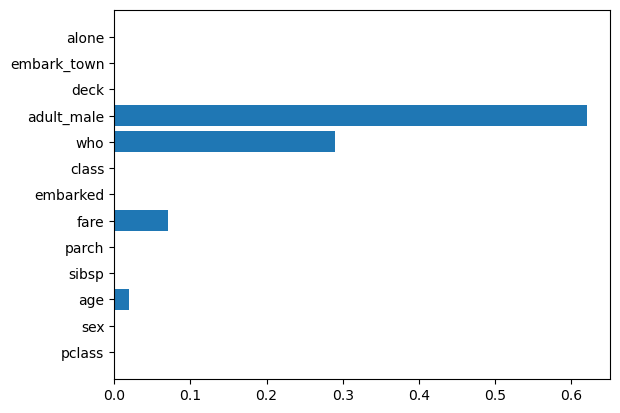

In [4]:
ada.feature_importances_
plt.barh(X.columns, ada.feature_importances_)

## 勾配ブースティング

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [6]:
class Boosting:
    def __init__(self, alpha, iteration, depth, randomseed):
        self.alpha = alpha
        self.iteration = iteration
        self.depth = depth
        self.randomseed = randomseed
    
    def fit(X, y):
        F0 = np.mean(y)
        Fb = F0
        
        for n in range(self.iteration):
            # 残差
            r = y- Fb
            # モデル作成・学習
            model = DecisionTreeRegressor(max_depth = self.depth, randam_state = self.randomseed)
            model.fit(X, r)
            y_pred = model.predict(X)
            

In [7]:
example = Boosting(alpha = 1, iteration = 100, depth = 5, randomseed = 0)
print(example.alpha)

1


In [8]:
# 動画内解答

In [9]:
class MyGradientBoostingRegressor:
    
    def __init__(self, learning_rate = 0.03, n_estimators = 100, max_depth = 1, random_state = 0):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators = []

    def fit(self, X, y):
        
        self.F0 = y.mean()
        Fb = self.F0
        
        for _ in range(self.n_estimators):
            # 残差を計算
            r = y - Fb
            estimator = DecisionTreeRegressor(max_depth = self.max_depth, random_state = self.random_state)
            estimator.fit(X, r)
            weight = estimator.predict(X)
            Fb = Fb + self.learning_rate * weight
            self.estimators.append(estimator)
    
    def predict(self, X):
        
        Fb = self.F0
        
        for estimator in self.estimators:
            Fb += self.learning_rate * estimator.predict(X)
        
        return Fb

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower'>

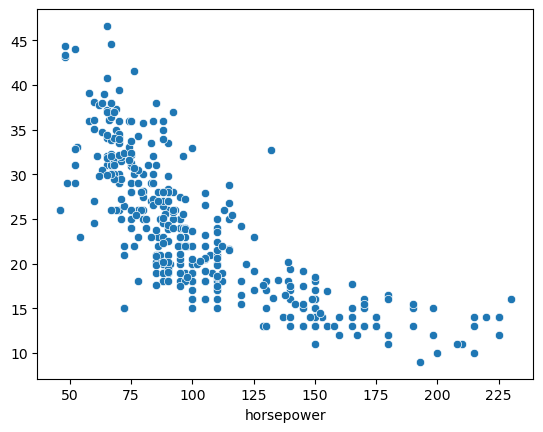

In [10]:
# データ準備
df = sns.load_dataset('mpg')
df.dropna(inplace = True)
X = df["horsepower"].values.reshape(-1, 1)
y = df['mpg'].values
sns.scatterplot(df['horsepower'], y)

In [11]:
my_gbr = MyGradientBoostingRegressor()
my_gbr.fit(X, y)
my_gbr.predict(X)

array([17.95434839, 15.74535562, 15.74535562, 15.74535562, 16.96376992,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 15.74535562,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 23.01512881,
       23.01512881, 22.21547999, 24.54754893, 24.54754893, 31.96655862,
       24.54754893, 24.54754893, 23.01512881, 20.76151767, 24.54754893,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 24.54754893,
       24.54754893, 23.01512881, 20.76151767, 20.76151767, 20.76151767,
       24.54754893, 20.76151767, 15.74535562, 15.74535562, 15.74535562,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 20.76151767,
       27.71424635, 20.76151767, 24.54754893, 24.54754893, 24.54754893,
       31.61939691, 27.71424635, 31.96655862, 31.61939691, 31.96655862,
       31.61939691, 23.01512881, 27.71424635, 31.96655862, 24.54754893,
       24.54754893, 15.74535562, 15.74535562, 15.74535562, 15.74535562,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 15.74

### sklearnのGradientBoostingRegressorを使う

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
lr = 0.03
gbr = GradientBoostingRegressor(max_depth = 1, learning_rate = lr, random_state = 0).fit(X, y)

In [14]:
gbr.predict(X) == my_gbr.predict(X)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

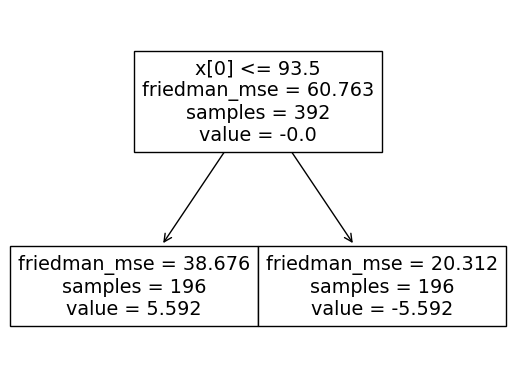

In [21]:
from sklearn.tree import plot_tree
model = gbr.estimators_[0][0]
_ = plot_tree(model)

In [16]:
results = []
idx = 0
for t in gbr.estimators_:
    result = t[0].predict([X[idx]])
    results.append(result * lr)

In [17]:
import numpy as np
F0 = np.mean(y)
Fb = F0 + np.cumsum(results)

In [18]:
Fb

array([23.27816327, 23.11544082, 22.94214051, 22.83197263, 22.66717637,
       22.56240126, 22.39804993, 22.29831511, 22.16208788, 22.06741995,
       21.91791807, 21.82781582, 21.68550205, 21.48669171, 21.40205747,
       21.21175047, 21.13072954, 20.93845051, 20.8608364 , 20.73833629,
       20.55782906, 20.50937386, 20.40900234, 20.36266681, 20.19342967,
       20.12570603, 19.9635777 , 19.92025031, 19.77227178, 19.72881191,
       19.57859041, 19.53845808, 19.44223474, 19.38388218, 19.24400857,
       19.20663613, 19.07207991, 19.03612626, 18.96133881, 18.8341415 ,
       18.80004406, 18.8386471 , 18.80441851, 18.75583214, 18.79101068,
       18.76000512, 18.65335356, 18.58370409, 18.55427539, 18.58646165,
       18.55812939, 18.58911825, 18.54763487, 18.57735466, 18.55081739,
       18.48743756, 18.46201512, 18.48989963, 18.43780306, 18.41367401,
       18.43872786, 18.41448352, 18.43860796, 18.4045305 , 18.32739886,
       18.30562399, 18.32804948, 18.30707665, 18.25674972, 18.27

In [19]:
y[0]

18.0

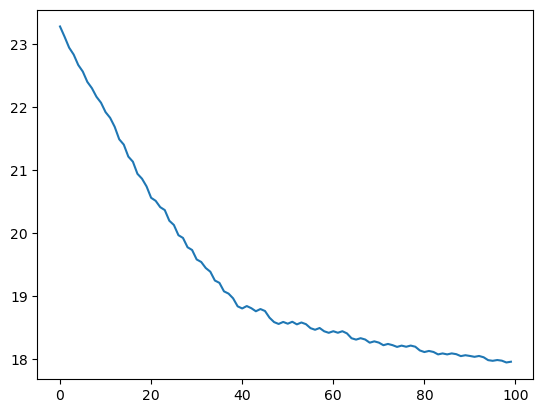

In [20]:
# y[0]の値にどんどん近づいている
# イテレーションを繰り返すことによってどんどんF0に残差を足していくことによってy[0]に近づいていく
plt.plot(Fb)

### 勾配ブースティングによる分類

In [26]:
model = DecisionTreeRegressor(max_depth = 1, random_state = 0).fit(X, y)

In [27]:
# 各特徴量がどの葉に行ったかを示す(葉のid)
model.apply(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,

In [30]:
# 各ノードの値
model.tree_.value

array([[[23.44591837]],

       [[29.0377551 ]],

       [[17.85408163]]])

[Text(0.5, 0.75, 'x[0] <= 93.5\nsquared_error = 60.763\nsamples = 392\nvalue = 23.446'),
 Text(0.25, 0.25, 'squared_error = 38.676\nsamples = 196\nvalue = 29.038'),
 Text(0.75, 0.25, 'squared_error = 20.312\nsamples = 196\nvalue = 17.854')]

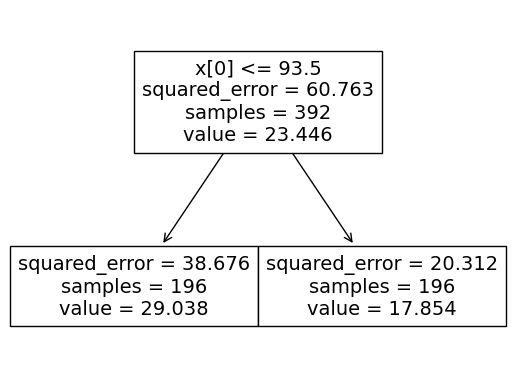

In [31]:
plot_tree(model)

チャレンジ

In [68]:
class MyGradientBoostingClassifier:
    
    def __init__(self, learning_rate = 0.03, n_estimators = 100, max_depth = 1, random_state = 0):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators = []
    
    def fit(self, X, y):
        self.F0 = np.log(y.mean()/(1 - y.mean()))
        F0 = np.full(len(y), self.F0)
        Fb = F0
        
        # 残差を計算
        for _ in range(self.n_estimators):
            p = 1 / (1 + np.exp(-Fb))
            r = y - p
            estimator = DecisionTreeRegressor(max_depth = self.max_depth, random_state = self.random_state)
            estimator.fit(X, r)
            X_leafs = estimator.apply(X)
            leaf_ids = np.unique(X_leafs)
            for leaf_id in leaf_ids:
                # 弱学習器の出力の値を計算
                fltr = X_leafs == leaf_id
                num = r[fltr].sum()
                den = (p[fltr] * (1 - p[fltr])).sum()
                estimator_pred_proba = num / den
                # 弱学習器の出力を上書き
                # 上書きすることでFbの更新ができる
                estimator.tree_.value[leaf_id, 0, 0] = estimator_pred_proba
                # 当該データのFbを更新
                Fb[fltr] += self.learning_rate * estimator_pred_proba
            
            self.estimators.append(estimator)
        
    def predict_proba(self, X):
        
        Fb = np.full(X.shape[0], self.F0)
        
        for estimator in self.estimators:
            Fb += self.learning_rate * estimator.predict(X)
        
        return 1 / (1 + np.exp(-Fb))    

In [40]:
# データ準備
df = sns.load_dataset('titanic')
df = df.dropna()

# 学習データ作成
X = df.loc[:, (df.columns != 'survived') & (df.columns != 'alive')]
y = df["survived"]

# 決定木モデルではワンホットエンコーディングではなく、ラベルエンコーディングでも問題ない
# 理由：
oe = OrdinalEncoder()
oe.set_output(transform = 'pandas')
X = oe.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [41]:
my_gbc = MyGradientBoostingClassifier()
my_gbc.fit(X_train, y_train)
my_gbc.predict_proba(X_test)

array([0.5514342 , 0.4329777 , 0.80125347, 0.80125347, 0.5514342 ,
       0.25797762, 0.5514342 , 0.83715418, 0.88099514, 0.88099514,
       0.5514342 , 0.82137752, 0.82137752, 0.88099514, 0.5514342 ,
       0.5514342 , 0.5514342 , 0.82137752, 0.88099514, 0.40100637,
       0.88099514, 0.78760146, 0.88099514, 0.88099514, 0.80125347,
       0.5514342 , 0.40100637, 0.80125347, 0.4329777 , 0.4329777 ,
       0.4329777 , 0.88099514, 0.88099514, 0.88099514, 0.82137752,
       0.88099514, 0.82137752, 0.88099514, 0.40100637, 0.5514342 ,
       0.4329777 , 0.82137752, 0.5514342 , 0.78760146, 0.40100637,
       0.88099514, 0.88099514, 0.5514342 , 0.5514342 , 0.5514342 ,
       0.5514342 , 0.82137752, 0.5514342 , 0.88099514, 0.88099514])

### SklearnのGradientBoostingClassifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.03, max_depth = 1, random_state = 0).fit(X_train, y_train)
gbc.predict_proba(X_test)[:, 1]
print(f"grad boost AUC :{roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])}")

grad boost AUC :0.9407051282051282


In [61]:
results = []
for t in gbc.estimators_:
    result = 0.03 * t[0].predict([X_test.iloc[1]])
    results.append(result)

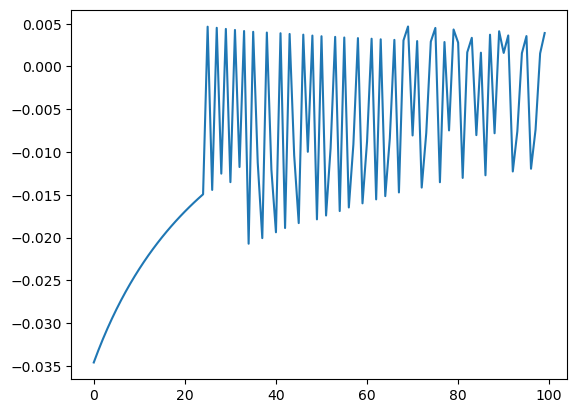

In [62]:
plt.plot(results)

In [63]:
F0 = np.log(y_train.mean() / (1 - y_train.mean()))
Fb = F0 + np.cumsum(results)[-1]
predict = 1 / (1 + np.exp(-Fb))

In [64]:
predict

0.4329777013086353

In [66]:
y_test.iloc[1]

0

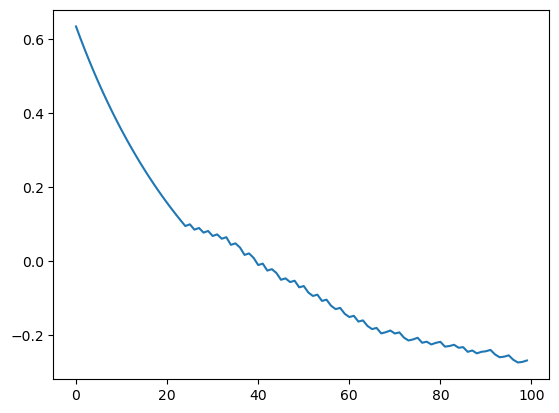

In [67]:
plt.plot(F0 + np.cumsum(results))

## 復習

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = sns.load_dataset('titanic')
df.dropna(inplace = True)

# 学習データと正解データ
X = df.loc[:, (df.columns != 'survived') & (df.columns != 'alive')]
y = df['survived']

# ラベルエンコーディング
oe = OrdinalEncoder()
oe.set_output(transform = 'pandas')
X = oe.fit_transform(X)

cv = KFold(n_splits = 5, shuffle = True, random_state = 0)
roc_auc_score = make_scorer(roc_auc_score, greater_is_better = True)
ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.01, random_state = 0)
score = cross_val_score(ada, X, y, scoring = roc_auc_score)

In [10]:
score.mean()

0.8104090909090909